# <center> Nén Dữ Liệu Thông Qua Giảm Chiều Dữ Liệu</center>
 <center>-Compressing Data via Dimentionality Reduction-</center>

## Giới thiệu

**Giảm chiều dữ liệu** (dimentionality reduction) là một kỹ thuật quan trọng trong machine learning, trong thực tế các **vector đặc trưng** (feature vectors) có thể có số chiều rất lớn, tới vài nghìn. Đồng thời, lượng điểm dữ liệu cũng rất lớn. Điều đó sẽ gây khó khăn cho việc lưu trữ và tính toán. Vì vậy, đây là một bước quan trọng trong nhiều bài toán, và cũng được xem là một phương pháp **nén dữ liệu** (compressing data)

Như ở chương trước, chúng ta có nói về các phương pháp được sử dụng để giảm vấn đề **quá khớp** (overfitting) như việc trừng phạt lên sự phức tạp thông qua phương pháp **chính quy hóa** (regularization) hay hướng **lựa chọn đặc trưng** (feature selection) trong phương pháp **giảm chiều** (dimentionality reduction) của dữ liệu.

Hôm nay ta sẽ tiếp tục tìm hiểu một hướng khác của phương pháp **giảm chiều** đó là **trích xuất đặc trưng** (feature extraction)

## Trích xuất đặc trưng (feature extraction)

Tương tự như **lựa chọn đặc trưng** (feature selection), đây cũng là một kỹ thuật dùng để giảm số lượng đặc trưng / số chiều của tập dữ liệu. Sự khác biệt giữa feature selection và feature extraction là ta vẫn sẽ duy trì các features gốc khi sử dụng các thuật toán feature selection, còn đối với feature extraction, ta sẽ chuyển đổi hoặc chiếu dữ liệu của ta vào một không gian features mới. 
Có 3 thuật toán được sử dụng trong feature extraction:
- Principal component analysis (PCA)
- Linear discriminant analysis (LDA) 
- Kernel principal component analysis (KPCA)

## Principal component analysis (PCA)

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca1.PNG?raw=true)

Cùng là 1 chú lạc đà, tuy nhiên với các cách nhìn khác nhau (trục thông tin), chúng ta lại có những cách thu nhận thông tin khác nhau và cho ta những kết luận khác nhau.

PCA là việc ta tìm một không gian mới (với số chiều nhỏ hơn không gian cũ), các trục tọa độ trong không gian mới được xây dựng sao cho trên mỗi trục, độ biến thiên của dữ liệu trên đó là lớn nhất có thể.
Ví dụ minh họa:

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca2.PNG?raw=true)

### Cở sở toán học

##### Kỳ vọng (mean)
- Là giá trị mong muốn, nó đơn giản là trung bình cộng của toàn bộ các giá trị

Cho $N$ giá trị $x_1, x_2, ..., x_N$.

$$\bar{x} = \frac{1}{N} \sum_{n=1}^{N}x_n$$


##### Phương sai (variance)
- Là trung bình cộng của bình phương khoảng cách từ mỗi điểm tới kỳ vọng, phương sai càng nhỏ thì các điểm dữ liệu càng gần với kỳ vọng, tức các điểm dữ liệu càng giống nhau. Phương sai càng lớn thì ta nói dữ liệu càng có tính phân tán

$$\sigma^2 = \frac{1}{N-1} \sum_{n=1}^{N}(x_n-\bar{x})^2$$


##### Hiệp phương sai (covariance)
- Là độ đo sự biến thiên cùng nhau của hai biến ngẫu nhiên (phân biệt với phương sai - đo mức độ biến thiên của một biến). Nếu 2 biến có xu hướng thay đổi cùng nhau (nghĩa là, khi một biến có giá trị cao hơn giá trị kỳ vòng thì biến kia có xu hướng cũng cao hơn giá trị kỳ vọng), thì hiệp phương sai giữa hai biến này có giá trị dương. Mặt khác, nếu một biến nằm trên giá trị kì vọng còn biến kia có xu hướng nằm dưới giá trị kì vọng, thì hiệp phương sai của hai biến này có giá trị âm. Nếu hai biến này độc lập với nhau thì giá trị bằng 0

$$COV(X, Y) = \frac{\sum_{n=1}^{N}(X_n - \bar{X})(Y_n - \bar{Y})}{N}$$

##### Ma trận hiệp phương sai
- Cho N điểm dữ liệu được biểu diễn bởi các vector cột $x_1, ..., x_N$, khi đó, vector kỳ vọng và ma trận hiệp phương sai của toàn bộ dữ liệu được định nghĩa là:

$$\bar{x} = \frac{1}{N} \sum_{n=1}^{N}x_n$$

$$S = \frac{1}{N} \sum_{n=1}^{N}(x_n - \bar{x})(x_n - \bar{x})^T = \frac{1}{N}\hat{X}\hat{X}^T$$

- Ma trận hiệp phương sai là một ma trận đối xứng, hơn nữa, nó là một ma trận nửa xác định dương.
- Mọi phần tử trên đường chéo của ma trận hiệp phương sai là các số không âm. Chúng cũng chính là phương sai của từng chiều của dữ liệu.
- Các phần tử ngoài đường chéo $S_{ịj}, i \ne j$ thể hiện sự tương quan giữa thành phần thứ i và thứ j của dữ liệu, còn được gọi là hiệp phương sai. Giá trị này có thể dương, âm hoặc bằng 0. Khi nó bằng 0, ta nói rằng hai thành phần i, j trong dữ liệu là không tương quan (uncorrelated).
- Nếu ma trận hiệp phương sai là ma trận đường chéo, ta có dữ liệu hoàn toàn không tương quan giữa các chiều.

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca3.PNG?raw=true)

##### Trị riêng (eigenvalue), vector riêng(eigenvector) của covariance matrix
Cho một ma trận vuông $A \in R^{n \times n}$, nếu số vô hướng $\lambda$ và vector $x \ne 0 \in R^n$ thoả mãn:

$$Ax = \lambda x$$

thì $\lambda$ được gọi là một trị riêng của $A$ và $x$ được gọi là vector riêng tương ứng với trị riêng đó.

- Trị riêng là nghiệm của phương trình đặc trưng $$det(A - \lambda I) = 0$$
- Một trị riêng có thể có nhiều vector riêng
- Mỗi vector riêng chỉ ứng với một trị riêng duy nhất
- Nếu $x$ là một vector riêng của A ứng với $\lambda$ thì $kx, k \ne 0$ cũng là vector riêng ứng với trị riêng đó
- Mọi ma trận vuông bậc n đều có n trị riêng (kể cả lặp) và có thể là các số phức.
- Với ma trận đối xứng, tất cả các trị riêng đều là các số thực.
- Với ma trận xác định dương, tất cả các trị riêng của nó đều là các số thực dương. Với ma trận nửa xác định dương, tất cả các trị riêng của nó đều là các số thực không âm.

##### Phương pháp giải tìm trị riêng, vector riêng
B1: giải phương trình đặc trưng để tìm trị riêng: $$det(A - \lambda I) = 0$$

B2: giải hệ phương trình tìm vector riêng $u_i$ tương ứng với trị riêng $\lambda_i$ $$(A - \lambda I)u = 0$$

### Thuật toán PCA

PCA về cơ bản là một kỹ thuật giảm kích thước đơn giản, biến đổi các cột của bộ dữ liệu thành một tập các đặc trưng mới. Nó thực hiện điều này bằng cách tìm một tập hợp các hướng mới (như trục X và Y) giải thích sự biến đổi tối đa trong dữ liệu.

Trục tọa độ hệ thống mới này được gọi là Principal Components (PCs). Các phép chiếu của dữ liệu gốc trên bộ trục tọa độ (PC) mới đóng vai trò là bộ dữ liệu được chuyển đổi mới.

Nhưng tại sao lại tính toán PCs?

Vì thông tin chứa trong một cột dữ liệu (biến) là lượng phương sai mà nó chứa. Nó sẽ giải thích hiệu quả thông tin khổng lồ có trong dữ liệu gốc thành số cột ít hơn

Các bước của thuật toán PCA
##### 1. Chuẩn hóa tập dữ liệu d chiều
##### 2. Tìm ma trận hiệp phương sai (covariance matrix)
$$S =  \frac{1}{N}\hat{X}\hat{X}^T$$

##### 3. Tìm các trị riêng và vector riêng của ma trận này, sắp xếp chúng theo thứ tự giảm dần của trị riêng.
$$\lambda_1 \ge \lambda_2 \ge ... \ge \lambda_n$$
$$u_1, u_2, ..., u_n$$

- Các vector $u_i$ là độc lập tuyến tính, và chính là các trục của không gian mới

##### 4. Chọn $K$ vector riêng ứng với $K$ trị riêng lớn nhất để xây dựng ma trận $U_K$. $K$ vectors này, còn được gọi là các thành phần chính (principal component), tạo thành một không gian con gần với phân bố của dữ liệu ban đầu đã chuẩn hoá. 

##### 5. Xây dựng ma trận chiếu ( projection matrix) W từ 'top' $K$ vector riêng
##### 6. Chiếu dữ liệu ban đầu đã chuẩn hoá $\hat{X}$ thông qua W để tạo thành không gian đặc trưng mới K chiều. Dữ liệu mới chính là toạ độ của các điểm dữ liệu trên không gian mới $$Z = U_K^T\hat X$$

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca4.PNG?raw=true)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


Trước khi đi tới bước chọn K vector riêng, ta sẽ vẽ một biểu đồ thể hiện tỉ lệ giải thích phương sai (variance explained ratios) của trị riêng. Công thức của nó là: $$\text{Explained variance ratio} = \frac{\lambda_i}{\sum_{i=1}^n \lambda_i}$$

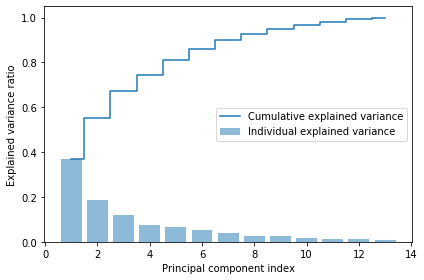

In [7]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Matrix W chính là ma trận giúp ta chuyển đổi dữ liệu D chiều sang K chiều với K $\leq$ D
- Vector: $x' = xW$
- Matrix: $X' = XW$

In [10]:
x_origin = X_train_std[0].shape[0]
x_new = X_train_std[0].dot(w).shape[0]
print('Từ', x_origin, 'chiều còn lại', x_new, 'chiều')

Từ 13 chiều còn lại 2 chiều


In [11]:
X_train_pca = X_train_std.dot(w)

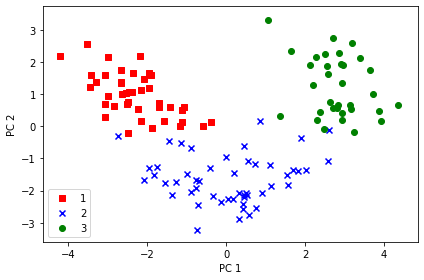

In [12]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

- Dữ liệu được trải rộng hơn ở trục x - thành phần chính đầu tiên (the first principal component)
- Dữ liệu được trải rộng it hơn ở trục y - thành phần chính thứ hai (the second principal component)

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

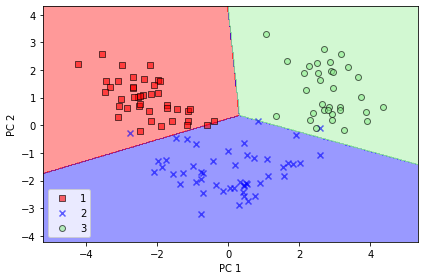

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [16]:
print(X_train_std.shape, X_train_pca.shape)

(124, 13) (124, 2)


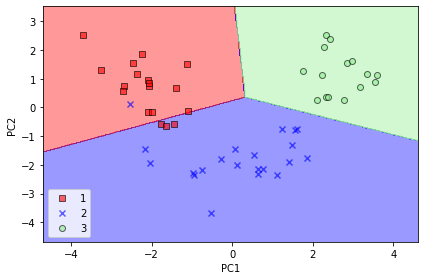

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Linear discriminant analysis (LDA)

### Giới thiệu

Ở thuật toán PCA trên, đó là một phương pháp **unsupervised learning**, tức là nó chỉ sử dụng vector biểu diễn dữ liệu, không sử dụng labels. Trong bài toán **classification**, điển hình nhất là phương pháp **suppervised learning**, việc sử dụng labels sẽ mang lại kết quả phân loại tốt hơn.

Nhắc lại một lần nữa, PCA là phương pháp giảm chiều dữ liệu sao cho lượng thông tin của dữ liệu (thể hiện ở tổng phương sai) được giữ lại nhiều nhất. Tuy nhiên, trong nhiều trường hợp, ta không cần giữ lại lượng thông tin lớn nhất mà chỉ cần giữ lại lượng thông tin cần thiết cho riêng mỗi bài toán. Ta xem ví dụ sau:

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/lda1.png?raw=true)

Giả sử ta có một tập dữ liệu gồm 2 lớp, nhiều chiều. Ta sẽ thực hiện giảm chiều của tập dữ liệu này xuống 1 chiều bằng cách ta chiếu chúng lên một đường thẳng. Ở đây ta thực hiện 2 cách chiếu, nếu dùng PCA, thì phương của $d_1$ gần giống với thành phần chính thứ 1 của dữ liệu, phương của $d_2$ gần giống với thành phần chính tiếp theo. Các đường cong hình chuông thể hiện xấp xỉ phân bố xác suất của dữ liệu hình chiếu trong mỗi class.

Theo PCA, khi giảm về một chiều, ta sẽ chọn giảm chiều theo hướng $d_1$. Các điểm màu đỏ và xanh bị chồng lấn lên nhau, khiến cho việc phân loại dữ liệu là không khả thi trên đường thẳng này. Ngược lại nếu chiếu theo cách $d_2$, việc classify sẽ trở nên dễ dàng và chính xác hơn. 

Việc phân loại một điểm dữ liệu mới sẽ được xác định bằng cách so sánh hình chiếu của nó lên $d_2$ với điểm màu xanh lục này.

$\implies$ Qua ví dụ trên ta thấy, **không phải việc giữ lại thông tin nhiều nhất sẽ luôn mang lại kết quả tốt nhất**


**Linear Discriminant Analysis** (LDA) được ra đời nhằm giải quyết vấn đề này. LDA là một phương pháp giảm chiều dữ liệu cho bài toán classification. LDA có thể được coi là một phương pháp giảm chiều dữ liệu (dimensionality reduction), và cũng có thể được coi là một phương pháp phân lớp (classification), và cũng có thể được áp dụng đồng thời cho cả hai, tức là giảm chiều dữ liệu sao cho việc phân lớp hiệu quả nhất. 

Số chiều của dữ liệu mới là nhỏ hơn hoặc bằng $C - 1$ trong đó $C$ là số lượng classes. Từ **Discriminant** được hiểu là những thông tin đặc trưng cho mỗi class, khiến nó không bị lẫn với các classes khác. Từ **Linear** được dùng vì cách giảm chiều dữ liệu được thực hiện bởi một ma trận chiếu (projection matrix), là một phép biến đổi tuyến tính (linear transform)

### Ý tưởng cơ bản

Quay lại hình trên, ta thấy độ rộng của mỗi đường hình chuông thể hiện độ lệch chuẩn của dữ liệu. Dữ liệu càng tập trung thì độ lệch chuẩn càng nhỏ, càng phân tán thì độ lệch chuẩn càng cao. Khi được chiếu lên $d_1$, dữ liệu của hai classes bị phân tán quá nhiều, khiến cho chúng bị trộn lẫn vào nhau. Khi được chiếu lên $d_2$, mỗi classes đều có độ lệch chuẩn nhỏ, khiến cho dữ liệu trong từng class tập trung hơn, dẫn đến kết quả tốt hơn.

Tuy nhiên, việc độ lệch chuẩn nhỏ trong mỗi class chưa đủ để đảm bảo độ Discriminant của dữ liệu. Ta xem ví dụ sau:

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/lda2.png?raw=true)

Ở đây,
- $(m_1 - m_2)^2$ là khoảng cách giữa 2 kỳ vọng (mean)
- $s_1^2 + s_2^2$ là tổng phương sai của dữ liệu

a) Khoảng cách giữa hai kỳ vọng là lớn nhưng phương sai trong mỗi class cũng lớn, khiến cho hai phân phối chồng lấn lên nhau (phần màu xám). 

b) Phương sai cho mỗi class là rất nhỏ nhưng hai kỳ vọng quá gần nhau, khiến khó phân biệt 2 class. 

c) Khi phương sai đủ nhỏ và khoảng cách giữa hai kỳ vọng đủ lớn, ta thấy rằng dữ liệu discriminant hơn.

Độ lệch chuẩn nhỏ thể hiện việc dữ liệu ít phân tán. Điều này có nghĩa là dữ liệu trong mỗi class có xu hướng giống nhau. Hai phương sai $s_1^2, s_2^2$ còn được gọi là các **within-class scatter**.

Khoảng cách giữa các kỳ vọng là lớn chứng tỏ rằng hai classes nằm xa nhau, tức dữ liệu giữa các classes là khác nhau nhiều. Bình phương khoảng cách giữa hai kỳ vọng $(m_1 - m_2)^2$ còn được gọi là **between-class scatter**.

$\implies$ Hai classes được gọi là discriminative nếu hai class đó cách xa nhau (**between-class scatter** lớn) và dữ liệu trong mỗi class có xu hướng giống nhau (**within-class scatter** nhỏ). **Linear Discriminant Analysis** là thuật toán đi tìm một phép chiếu sao cho tỉ lệ giữa **between-class scatter** và **within-class scatter** lớn nhất có thể.

### Xây dựng hàm mục tiêu

Giả sử ta có $N$ điểm dữ liệu $x_1, x_2, ..., x_N$ trong đó $N_1 < n$ điểm đầu tiên thuộc class 1, $N_2 = N - N_1$ điểm còn lại thuộc class 2. Gọi 
- $C_1$ là index của các điểm thuộc class 1, 
- $C_2$ là index các điểm thuộc class 2. 

Phép chiếu dữ liệu xuống 1 đường thẳng có thể được mô tả bằng một vector hệ số $w$, giá trị tương ứng của mỗi điểm dữ liệu mới được cho bởi: $$y_n = w^Tx_n, 1 \le n \le N$$

Vector kỳ vọng của mỗi class: $$m_{xk} = \frac{1}{N_k}\sum_{n \in C_k}x_n, k = 1, 2 \space \space \space \space(1)$$

Khi đó: $$m_{y1} - m_{y2} = \frac{1}{N_1}\sum_{i \in C_1}y_i - \frac{1}{N_2}\sum_{j \in C_2}y_j = w^T(m_{x1} - m_{x2}) \space \space \space \space(2)$$

Các **within-class scatter** được định nghĩa là: $$s_k^2 = \sum_{n \in C_k}(y_n - m_{yk})^2, k = 1, 2 \space \space \space \space(3)$$

LDA là thuật toán đi tìm giá trị lớn nhất của hàm mục tiêu: $$J(w) = \frac{(m_{y1} - m_{y2})^2}{s_1^2 + s_2^2} \space \space \space \space(4)$$

Áp dụng đẳng thức: $$(a^Tb)^2 = (a^Tb)(a^Tb) = a^Tbb^Ta$$ với a, b là 2 vector cùng chiều bất kỳ.

Với tử số của (4): $$(m_{y1} - m_{y2})^2 = (w^T(m_{x1} - m_{x2}))^2 = w^T\underbrace{(m_{x1} - m_{x2})(m_{x1} - m_{x2})^T}_{S_B}w = w^TS_Bw \space \space \space \space(5)$$ $S_B$ còn được gọi là **between-class scatter matrix**. Đây là một ma trận nửa xác định dương.

Với mẫu số của (4): $$s_1^2 + s_2^2 = \sum_{k=1}^2\sum_{n \in C_k}(w^T(x_n - m_{xk}))^2 = w^T\underbrace{\sum_{k=1}^2\sum_{n \in C_k}(x_n - m_{xk})(x_n - m_{xk})^T}_{S_w}w = w^TS_ww \space \space \space \space(6)$$ **S_w** còn được gọi là **within-class scatter matrix**. Đây cũng là một ma trận nửa xác định dương vì nó là tổng của hai ma trận nửa xác định dương.

Như vậy, bài toán tối ưu cho LDA trở thành: $$w = \underset{w}{\arg\max}\frac{w^TS_Bw}{w^TS_ww} \space \space \space \space(7)$$

Nghiệm $w$ của (7) sẽ là nghiệm của phương trình đạo hàm hàm mục tiêu bằng 0: 


$$\nabla_w J(w) = 0$$


$$\Leftrightarrow S_W^{-1}S_Bw = J(w)w$$


Để hàm mục tiêu của ta là lớn nhất thì J(w) chính là trị riêng lớn nhất của $S_w^{-1}S_B$

### Thuật toán LDA

Các bước của thuật toán LDA
##### 1. Chuẩn hóa tập dữ liệu d chiều
##### 2. Với mỗi class, tính mean vector d chiều
##### 3. Xây dựng the between-class scatter matrix $S_B$ và the within-class scatter matrix $S_w$
##### 4. Tính toán vector riêng và trị riêng tương ứng của ma trận $S_w^{-1}S_B$
##### 5. Sắp xếp chúng theo thứ tự giảm dần của trị riêng
##### 6. Chọn $K$ vector riêng ứng với $K$ trị riêng lớn nhất để xây dựng ma trận chuyển đổi (transformation matrix) d x k chiều, mỗi vector riêng là một cột của dữ liệu
##### 7. Chiếu dữ liệu ban đầu đã chuẩn hoá $\hat{X}$ thông qua W để tạo thành không gian đặc trưng mới K chiều. 

In [16]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



Sử dụng vectors mean, chúng ta có thể tính toán the within-class scatter matrix, $S_w$

$$S_w = \sum_{i=1}^c S_i$$

Nó là tổng của các scatter matrices $S_i$

$$S_i = \sum_{x \in D_i} (x - m_i)(x - m_i)^T$$

In [17]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


Giả định mà chúng ta đang thực hiện khi tính toán các scatter matrices là các nhãn lớp trong tập dữ liệu huấn luyện được phân phối đồng đều. 
Tuy nhiên, nếu chúng ta in số lượng nhãn lớp, chúng ta thấy rằng giả định này đã bị vi phạm:

In [18]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


Vì vậy, chúng tôi nên scale các scatter matrices trước khi cộng vào $S_w$ , bằng cách chia cho số lượng class examples $n_i$, chúng ta có thể thấy rằng tính toán ma trận phân tán trên thực tế giống như tính toán ma trận hiệp phương sai, $\Sigma_i$ ma trận hiệp phương sai là một phiên bản chuẩn hóa của scatter matrices:
$$\Sigma_i = \frac{1}{n_i}S_i = \frac{1}{n_i}\sum_{x \in D_i} (x - m_i)(x - m_i)^T$$

In [19]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


$$S_B = \sum_{i=1}^{c}n_i(m_i - m)(m_i - m)^T$$

In [20]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (
S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


Tìm eigenvalue, eigenvector trong ma trận $S_W^{-1}S_B$

In [21]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [22]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


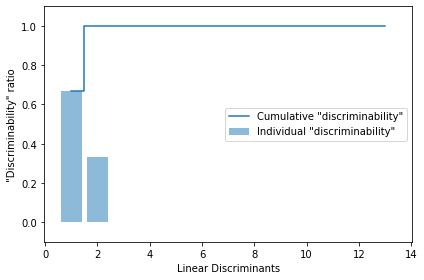

In [23]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Như chúng ta có thể thấy là chỉ với 2 linear discriminants đã chiếm 100% thồng tin của Wine dataset

Tiếp theo, dựa vào 2 eigenvector, ta chồng nó lên để tạo thành ma trận chuyển đổi (transformation matrix) W

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


Chiếu dữ liệu vào trong không gian mới: $$X' = XW$$

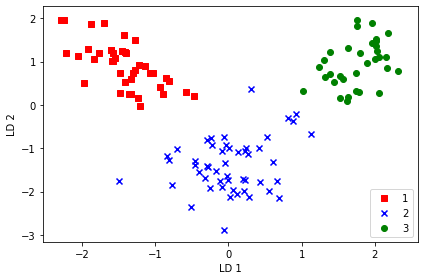

In [25]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Chúng ta có thể thấy là trong không gian con mới, 3 lớp được phân tách tuyến tính hoàn hảo

Áp dụng Scikit-Learn

In [26]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

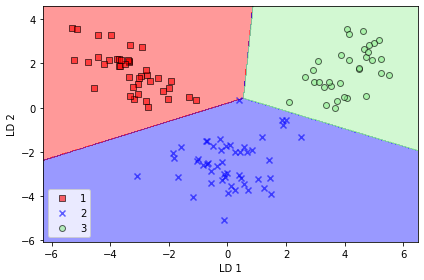

In [27]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

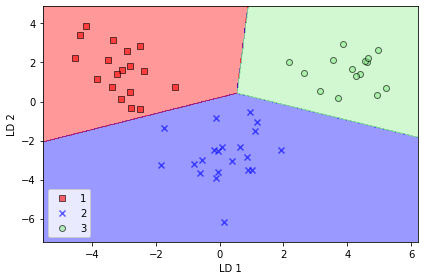

In [28]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()